In [18]:
import os

# Setup Paths

In [19]:
CUSTOM_MODEL_NAME = 'my_efficientdet_d2'
PRETRAINED_MODEL_NAME = 'efficientdet_d2_coco17_tpu-32'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d2_coco17_tpu-32.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [20]:
os.chdir("/Users/riturajsharma/Desktop/placement_job/fabrik/Connector_Detection_App/connector_detection_model")

In [21]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [22]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [23]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# Download TF pretrained models from Tensorflow Model Zoo and install Tensorflow Object Detection Model

In [24]:
# !pip install wget
import wget

In [25]:
# download tensorflow object detection API
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# install tensorflow object detection API
if os.name=='posix':  
#     !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Processing /Users/riturajsharma/Desktop/placement_job/fabrik/Connector_Detection_App/connector_detection_model/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Using cached avro_python3-1.10.2-py3-none-any.whl
  Using cached apache_beam-2.35.0-cp37-cp37m-macosx_10_9_x86_64.whl (4.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached Cython-0.29.27-py2.py3-none-any.whl (983 kB)
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
  Using cached pycocotools-2.0.4-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached lvis-0.5.3-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 5.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 2.

  Running setup.py install for object-detection ... done


In [15]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.7.11: /Users/riturajsharma/Desktop/placement_job/fabrik/Connector_Detection_App/connector_detection_model/cdenv/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-02-07 19:21:42.160608: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/riturajsharma/Desktop/placement_job/fabrik/Connector_Detection_App/connector_detection_model/cdenv/lib/python3.7/site-packages/object_detection/builders/model_builder.py:1100: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0207 19:21:42.604528 4379622912 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitt

I0207 19:21:50.927225 4379622912 efficientnet_model.py:144] round_filter input=24 output=24
I0207 19:21:50.927386 4379622912 efficientnet_model.py:144] round_filter input=40 output=40
I0207 19:21:51.196613 4379622912 efficientnet_model.py:144] round_filter input=40 output=40
I0207 19:21:51.196825 4379622912 efficientnet_model.py:144] round_filter input=80 output=80
I0207 19:21:51.622668 4379622912 efficientnet_model.py:144] round_filter input=80 output=80
I0207 19:21:51.622906 4379622912 efficientnet_model.py:144] round_filter input=112 output=112
I0207 19:21:51.993199 4379622912 efficientnet_model.py:144] round_filter input=112 output=112
I0207 19:21:51.993458 4379622912 efficientnet_model.py:144] round_filter input=192 output=192
I0207 19:21:52.585410 4379622912 efficientnet_model.py:144] round_filter input=192 output=192
I0207 19:21:52.585574 4379622912 efficientnet_model.py:144] round_filter input=320 output=320
I0207 19:21:52.727664 4379622912 efficientnet_model.py:144] round_filt

I0207 19:22:00.984728 4379622912 efficientnet_model.py:144] round_filter input=1280 output=1408
I0207 19:22:01.132375 4379622912 efficientnet_model.py:454] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv

I0207 19:22:12.252649 4379622912 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet EfficientNet backbone version: efficientnet-b5
I0207 19:22:12.252932 4379622912 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 288
I0207 19:22:12.253067 4379622912 ssd_efficientnet_bifpn_feature_extractor.py:149] EfficientDet BiFPN num iterations: 7
I0207 19:22:12.255826 4379622912 efficientnet_model.py:144] round_filter input=32 output=48
I0207 19:22:12.277475 4379622912 efficientnet_model.py:144] round_filter input=32 output=48
I0207 19:22:12.277631 4379622912 efficientnet_model.py:144] round_filter input=16 output=24
I0207 19:22:12.543853 4379622912 efficientnet_model.py:144] round_filter input=16 output=24
I0207 19:22:12.544020 4379622912 efficientnet_model.py:144] round_filter input=24 output=40
I0207 19:22:13.199305 4379622912 efficientnet_model.py:144] round_filter input=24 output=40
I0207 19:22:13.199472 4379622912 efficientnet_model.py:144] round_fil

I0207 19:22:28.835184 4379622912 efficientnet_model.py:144] round_filter input=24 output=48
I0207 19:22:28.835352 4379622912 efficientnet_model.py:144] round_filter input=40 output=80
I0207 19:22:30.048098 4379622912 efficientnet_model.py:144] round_filter input=40 output=80
I0207 19:22:30.048267 4379622912 efficientnet_model.py:144] round_filter input=80 output=160
I0207 19:22:31.877477 4379622912 efficientnet_model.py:144] round_filter input=80 output=160
I0207 19:22:31.877688 4379622912 efficientnet_model.py:144] round_filter input=112 output=224
I0207 19:22:33.227900 4379622912 efficientnet_model.py:144] round_filter input=112 output=224
I0207 19:22:33.228068 4379622912 efficientnet_model.py:144] round_filter input=192 output=384
I0207 19:22:35.306137 4379622912 efficientnet_model.py:144] round_filter input=192 output=384
I0207 19:22:35.306366 4379622912 efficientnet_model.py:144] round_filter input=320 output=640
I0207 19:22:36.189305 4379622912 efficientnet_model.py:144] round_fi

In [26]:
import object_detection

In [27]:
# Download pretrained object detection model 
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-02-08 17:09:00--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d2_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.163.208
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.163.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62929273 (60M) [application/x-tar]
Saving to: ‘efficientdet_d2_coco17_tpu-32.tar.gz’

efficientdet_d2_coc 100%[===================>]  60.01M  6.72MB/s    in 10s     

2022-02-08 17:09:11 (5.86 MB/s) - ‘efficientdet_d2_coco17_tpu-32.tar.gz’ saved [62929273/62929273]

x efficientdet_d2_coco17_tpu-32/
x efficientdet_d2_coco17_tpu-32/checkpoint/
x efficientdet_d2_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
x efficientdet_d2_coco17_tpu-32/checkpoint/checkpoint
x efficientdet_d2_coco17_tpu-32/checkpoint/ckpt-0.index
x efficientdet_d2_coco17_tpu-32/pipeline.config
x efficientdet_d2_coco17_tpu-32/saved_model/
x efficientdet_d2_coc

# Generating TF Records

In [28]:
labels = [{'name':'connector', 'id':1}]

# generating label_map
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [29]:
# creating tf_records of train
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 

# creating tf_records of test
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


In [30]:
# copy pipeline.config from pretrained models to custom model
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# Train and Evaluate Model 

In [31]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [32]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [34]:
# config

In [35]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  


In [36]:
# modify the pipeline.config of custom model as per the requirement of the custom model
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 1
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [37]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [39]:
# config_text

In [40]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [46]:
TRAINING_SCRIPT

'Tensorflow/models/research/object_detection/model_main_tf2.py'

In [44]:
# training command
train_command = command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])


In [45]:
train_command

'python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_efficientdet_d2 --pipeline_config_path=Tensorflow/workspace/models/my_efficientdet_d2/pipeline.config --num_train_steps=5000'

In [43]:
# !{command}

In [69]:
# evaluation command
eval_command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [70]:
eval_command

'python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet'

# Load Train Model from Checkpoint

In [9]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [10]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

2022-02-07 12:22:23.747953: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Detect from Image

In [11]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [13]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'IMG_20200228_122244.jpg')

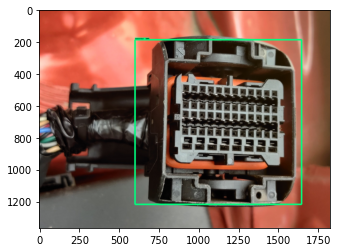

In [14]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=1,
            min_score_thresh=.5,
            agnostic_mode=False,
            line_thickness=10,
            )

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Real Time Detection from Webcam

In [16]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# Freezing the Graph

In [18]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')
FREEZE_SCRIPT

'Tensorflow/models/research/object_detection/exporter_main_v2.py '

In [19]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])



In [21]:
!{command}

2022-02-07 12:31:38.828908: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0207 12:31:39.321008 4452617728 deprecation.py:619] From /Users/riturajsharma/Desktop/placement_job/Fabrik/code/odenv/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py:464: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
I

W0207 12:32:12.018813 4452617728 save_impl.py:72] Skipping full serialization of Keras layer <keras.layers.core.lambda_layer.Lambda object at 0x7fcadb223950>, because it is not built.
W0207 12:32:12.018912 4452617728 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7fcadb223d90>, because it is not built.
W0207 12:32:12.019305 4452617728 save_impl.py:72] Skipping full serialization of Keras layer <keras.layers.core.lambda_layer.Lambda object at 0x7fcadb223f10>, because it is not built.
W0207 12:32:12.020207 4452617728 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7fcadb2238d0>, because it is not built.
W0207 12:32:12.022458 4452617728 save_impl.py:72] Skipping full serialization of Keras layer <keras.layers.core.lambda_layer.Lambda object at 0x7fcadb223550>, because it is not built.
W0207 12:32:12.022874 4452617728

INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
I0207 12:33:10.658879 4452617728 builder_impl.py:784] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
INFO:tensorflow:Writing pipeline config file to Tensorflow/workspace/models/my_ssd_mobnet/export/pipeline.config
I0207 12:33:14.123888 4452617728 config_util.py:254] Writing pipeline config file to Tensorflow/workspace/models/my_ssd_mobnet/export/pipeline.config


# Exporting to TensorflowJS (TFJS)

In [45]:
# !pip install tensorflowjs

In [46]:
tfjs_command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])


In [47]:
!{tfjs_command}

2022-02-07 14:53:53.285850: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-07 14:54:10.010489: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-02-07 14:54:10.011271: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2022-02-07 14:54:10.737058: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1149] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 3654 nodes (3244), 4879 edges (4462), time = 416.41ms.
  function_optimizer: function_optimizer did nothing. time = 12.901ms.

2022-02-07 14:54:17.700537: I t